In [3]:
import os
print(os.getcwd())
if os.getcwd().endswith("combined"):
    os.chdir("..")
    os.chdir("..")
print(os.getcwd())
from src.modelling import DeepModel_Trainer
from src.augmentation import Transformer,None_Transform
from src.data_modules import DataModule,ImagesDataset
from torch import nn
import pandas as pd
import torch
from torchvision import transforms,models
import nibabel as nib
import numpy as np
from src.evaluation import Evaluation
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma
/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma


In [4]:
results = pd.read_csv(f"./modelling/mri_data/results_augmented_weighted/test_results.csv")
results["y_pred_mri"] = (results["prediction"] > 0.11) 
results_tabular = pd.read_csv(f"./modelling/tabular_data/results_csv/xgboost_prediction.csv")
results["pred_tabular"] = results_tabular["prediction"]
results["proba_tabular"] = results_tabular["proba_tabular"]

In [5]:
y_pred_tabular = results["pred_tabular"]
y_true = results["Ground_Truth"]

In [6]:
def calc_metrics(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Extract values from the confusion matrix
    tn, fp, fn, tp = conf_matrix.ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    return sensitivity,specificity

In [18]:
calc_metrics(y_true, y_pred_tabular)

(0.6744186046511628, 0.8367346938775511)

## Compare MRI and tabular results

Text(0.5, 1.0, 'Vorhersagen von beiden Modellen')

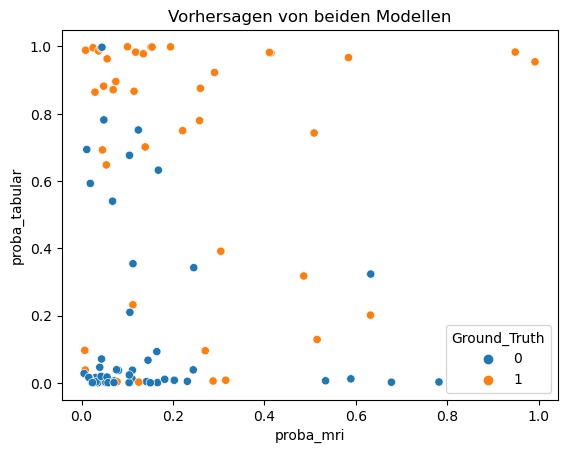

In [7]:
sns.scatterplot(x = results["prediction"],y = results["proba_tabular"],hue = results["Ground_Truth"])
plt.xlabel("proba_mri")
plt.title("Vorhersagen von beiden Modellen")

In [28]:
results[results["y_pred_mri"] & results["pred_tabular"]]["Ground_Truth"].mean()

0.8947368421052632

In [33]:
results[(results["y_pred_mri"]==False) & (results["pred_tabular"])]["Ground_Truth"].mean()

0.6666666666666666

In [29]:
1- results[(results["y_pred_mri"]==False) & (results["pred_tabular"]==False)]["Ground_Truth"].mean()

0.8214285714285714

In [34]:
1- results[(results["y_pred_mri"]) & (results["pred_tabular"]==False)]["Ground_Truth"].mean()

0.6666666666666667

## Qualitative Evaluation of Tabular results

In [12]:
index_fp = np.where((y_true == 0) & (y_pred_tabular==1))[0]
index_fn = np.where((y_true == 1) & (y_pred_tabular==0))[0]
index_tp = np.where((y_true == 1) & (y_pred_tabular==1))[0]
index_tn = np.where((y_true == 0) & (y_pred_tabular==0))[0]

### True positiv

In [13]:
Evaluation().visualize_slices(fold="test",index=index_tp,preprocess_slices=Transformer.select_roi)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma/src/augmentation.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  slice = torch.tensor(slice).unsqueeze(0)  # Add a channel dimension


interactive(children=(IntSlider(value=14, description='mri', max=28), IntSlider(value=9, description='slice_nu…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### True Negativ

In [14]:
Evaluation().visualize_slices(fold="test",index=index_tn,preprocess_slices=Transformer.select_roi)

interactive(children=(IntSlider(value=20, description='mri', max=40), IntSlider(value=7, description='slice_nu…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### False Positiv

In [15]:
Evaluation().visualize_slices(fold="test",index=index_fp,preprocess_slices=Transformer.select_roi)

interactive(children=(IntSlider(value=3, description='mri', max=7), IntSlider(value=7, description='slice_numb…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>

### False Negativ

In [35]:
Evaluation().visualize_slices(fold="test",index=index_fn,preprocess_slices=Transformer.select_roi)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/ksathmed1/code/Users/pro5d-classification-prolactinoma/src/augmentation.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  slice = torch.tensor(slice).unsqueeze(0)  # Add a channel dimension


interactive(children=(IntSlider(value=6, description='mri', max=13), IntSlider(value=9, description='slice_num…

<function src.evaluation.Evaluation.visualize_slices.<locals>.show_slice(mri, slice_number)>